# Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 

In [7]:
batch_size = 64
tfms = get_transforms()
model = models.resnet34
image_size = 256

In [8]:
data_path_str = "data"
train_path_str = "train"
test_path_str = "test"

# Loading Data

In [9]:
data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

# Loading Model

In [11]:
top_k_accuracy_3 = partial(top_k_accuracy, k=3)

In [12]:
learner = cnn_learner(data, model, metrics=top_k_accuracy_3)

In [19]:
file_name = "_".join([model.__name__, str(image_size), "stage1"]); file_name

'resnet34_256_stage1'

In [20]:
learner.load(file_name)

Learner(data=ImageDataBunch;

Train: LabelList (71808 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: data;

Valid: LabelList (17952 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
14208_Geoglossum_fallax,21234_Tubaria_furfuracea,14160_Ganoderma_pfeifferi,16867_Deconica_horizontalis,64423_Ciboria_amentacea
Path: data;

Test: LabelList (9758 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [21]:
results = ClassificationInterpretation.from_learner(learner)

In [22]:
results.most_confused()

[('11086_Xerocomellus_pruinatus', '11082_Xerocomellus_chrysenteron', 15),
 ('14833_Hygrocybe_conica var. conica', '63639_Hygrocybe_conica', 15),
 ('10263_Amanita_rubescens var. rubescens', '63479_Amanita_rubescens', 12),
 ('63570_Flammulina_velutipes',
  '14056_Flammulina_velutipes var. velutipes',
  11),
 ('63618_Leccinum_cyaneobasileucum', '16111_Leccinum_scabrum', 10),
 ('67681_Xylodon_raduloides', '67679_Xylodon_paradoxus', 10),
 ('14155_Ganoderma_adspersum', '14160_Ganoderma_pfeifferi', 9),
 ('63366_Flammulina_elastica', '14056_Flammulina_velutipes var. velutipes', 9),
 ('11101_Xerocomus_subtomentosus', '40854_Xerocomus_ferrugineus', 8),
 ('12979_Dacrymyces_lacrymalis', '12985_Dacrymyces_stillatus', 7),
 ('14852_Hygrocybe_miniata var. miniata', '63641_Hygrocybe_miniata', 7),
 ('15626_Laccaria_bicolor', '15651_Laccaria_proxima', 7),
 ('15651_Laccaria_proxima', '15639_Laccaria_laccata', 7),
 ('18919_Pluteus_salicinus', '18890_Pluteus_cervinus', 7),
 ('61279_Xerocomellus_cisalpinus',

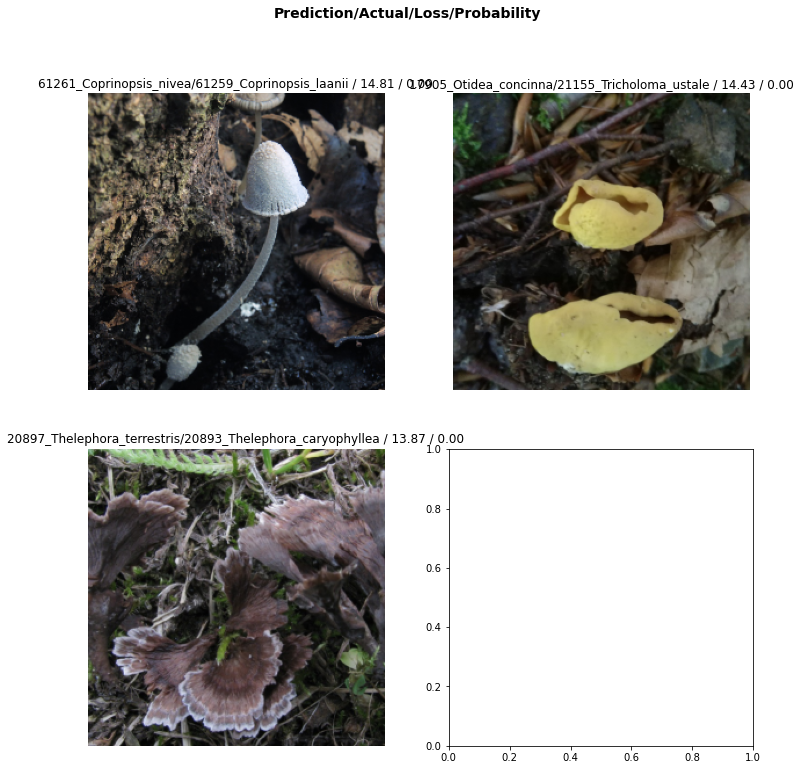

In [23]:
results.plot_top_losses(3)